In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

RANDOM_SEED = 42

In [3]:
df = pd.read_csv("./../data/Ana_Health-Tabela_Modelo_Previsao_Churn.csv",skiprows=1)
df

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
0,250,1971-04-01,64.0,82.0,São Paulo,São Paulo,04534-020,417.0,NaN,2021-01-28,...,2.0,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,5948,1990-08-13,64.0,80.0,Bahia,Salvador,41830-120,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,50.0,0.0,0.0,0.0,False
1198,5949,1997-04-17,64.0,80.0,São Paulo,São Paulo,05014-001,NaN,NaN,2023-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1199,5951,1973-10-20,111.0,83.0,São Paulo,São Paulo,04883-190,412.0,NaN,2023-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1200,5954,1970-08-14,63.0,82.0,São Paulo,São Paulo,04513-100,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,120.0,0.0,0.0,0.0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 75 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id_person                                   1202 non-null   int64  
 1   birthdate                                   1191 non-null   object 
 2   id_gender                                   1178 non-null   float64
 3   id_marrital_status                          1178 non-null   float64
 4   state                                       1185 non-null   object 
 5   city                                        1183 non-null   object 
 6   postal_code                                 1163 non-null   object 
 7   id_health_plan                              524 non-null    float64
 8   id_person_recommendation                    110 non-null    float64
 9   contract_start_date                         1202 non-null   object 
 10  contract_end

In [5]:
df.describe()

,id_person,id_gender,id_marrital_status,id_health_plan,id_person_recommendation,id_continuity_pf,Canal de Preferência,notes_count,done_activities_count,id_label,...,Mensagens Inbound,Mensagens Outbound,Ligações Inbound,Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência
count,1202.000000,1178.000000,1178.000000,524.000000,110.000000,395.000000,384.000000,1202.000000,1202.000000,103.000000,...,1091.000000,1158.000000,118.000000,579.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,3484.637271,63.729202,80.619694,417.921756,2555.736364,338.878481,244.635417,1.182196,10.122296,317.135922,...,75.735105,83.278066,3.144068,2.861831,6.325397,8.714286,94.484683,0.880952,0.250000,24.182738
std,1468.065478,3.353515,0.977062,129.712462,1213.154949,0.327144,25.618050,1.908197,8.938732,11.220647,...,104.519681,98.981933,8.482537,8.430147,4.803434,7.736556,32.399305,1.536318,0.821159,76.092674
min,250.000000,63.000000,80.000000,78.000000,321.000000,338.000000,238.000000,0.000000,0.000000,284.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,2399.250000,63.000000,80.000000,412.000000,1510.000000,339.000000,239.000000,0.000000,5.000000,313.000000,...,13.000000,19.000000,1.000000,1.000000,3.000000,3.000000,78.000000,0.000000,0.000000,0.000000
50%,3281.500000,64.000000,80.000000,412.000000,2379.000000,339.000000,239.000000,1.000000,8.000000,325.000000,...,40.000000,50.000000,1.000000,2.000000,5.000000,7.000000,88.000000,0.000000,0.000000,0.000000
75%,5114.750000,64.000000,82.000000,419.500000,3347.500000,339.000000,239.000000,2.000000,13.000000,325.000000,...,96.500000,110.000000,2.000000,3.000000,9.000000,12.000000,111.100000,1.000000,0.000000,0.000000
max,5956.000000,117.000000,83.000000,1164.000000,5556.000000,339.000000,360.000000,31.000000,137.000000,325.000000,...,1436.000000,1230.000000,80.000000,197.000000,30.000000,41.000000,383.750000,9.000000,7.000000,616.000000


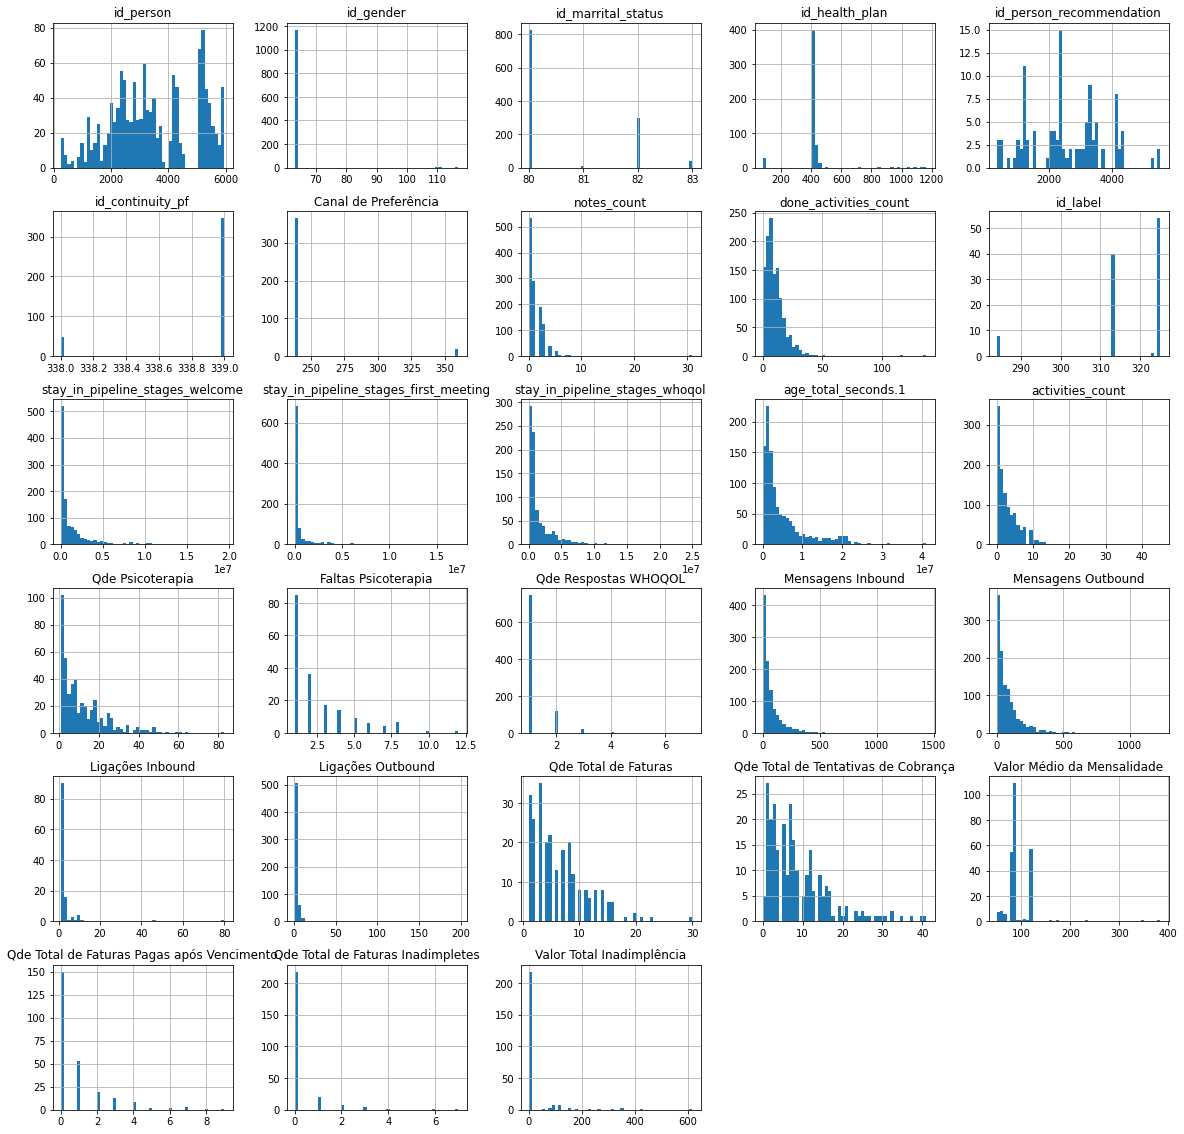

In [6]:
df.hist(bins=50, figsize=(20,20))
plt.show()

# Target - Achando a Coluna

Coluna do Target são `contract_end_date` e `lost_time`.

### Contract End Date - 
- Data de término do último contrato de assintura do benefício da Ana Health

### Lost Time - 
- Data de cancelamento do benefício da Ana Health por assinatura (separada por vírgula)
    - Pode ou não ter mais de um valor na amostra. Nesse caso, isso significa que o cliente teve mais de uma assinatura e acabou cancelando um ou mais dos planos.

### Status - Assinatura
- Nos trás o status de se o cliente cancelou a assinatura. `Lost` significa que ele acabou terminando a assinatura. 

### Status - Onboarding
- Nos trás o status de se o cliente foi bem-sucedido no processo de oboarding e adentrou a empresa. `Lost` significa que ele acabou não continuando após o processo de onboarding. 


## Análises a Serem Levadas em Consideração
- Motivo do cancelamento (falta de renda).
- Se foi a empresa que cancelou e não o funcionário.
- Desmembrar funcionário da empresa. Não há como retirar as empresas do DataSet. Talvez realizar uma análise separada para empresas ou para pessoa física.

## Primeiro Passo - 
- Se houver um valor de `Contract End Date` mas não há um valor em `Lost Time`, clonar o valor de do final do contrato para o lost time.


Cada amostra do DataSet é um usuário da plataforma. Esse usuário pode ou não ter cancelado a sua assinatura do serviço de saúde. Ou seja, precisamos criar uma coluna que diga se há uma data presente em uma das duas colunas mencionadas acima.


## Criação da Coluna de Has_Ended
Apenas criando uma coluna de se o usuário já cancelou a sua assinatura. Mas temos que acomodar o fato do cliente poder ter voltar para plataforma? Isso é algo a ser levado em consideração quano criamos nossa coluna de features. Para essa análise, escolhi não contemplar. 

In [7]:
df["Has-Ended"] = df['contract_end_date'].isna() + df['lost_time'].isna() 

df["Has-Ended"]

0       True
1       True
2       True
3       True
4       True
        ... 
1197    True
1198    True
1199    True
1200    True
1201    True
Name: Has-Ended, Length: 1202, dtype: bool

## Target -
A ideia é tentarmos prever se houve ou não um cancelamento por parte do cliente. Após isso, podemos realizar as análises de taxa de cancelamento por mês e etc. Então, temos uma coluna de target bem simples, que nos leva a realizar análises mais complexas. 

# Feature a Feature - Análises

**Minhas Colunas** - 
- 'lost_reason.1' - onboarding
- 'lost_reason' - assinatura
- 'Mensagens Outbound'
- 'Datas Atendimento Médico'
- 'stay_in_pipeline_stages_whoqol'
- 'id_label'
- 'done_activities_count'
- 'state'
- 'Faltas Psicoterapia'
- 'Data Última Mensagens Outbound'
- 'Qde Atendimentos Acolhimento'
- 'status_assinatura'


In [9]:
df_alfredo = df[['lost_reason.1', 'lost_reason', 'Mensagens Outbound', 'Datas Atendimento Médico', 'stay_in_pipeline_stages_whoqol', 'id_label', 'done_activities_count', 'state', 'Faltas Psicoterapia', 'Data Última Mensagens Outbound', 'Qde Atendimentos Acolhimento', 'status']]

df_alfredo

,lost_reason.1,lost_reason,Mensagens Outbound,Datas Atendimento Médico,stay_in_pipeline_stages_whoqol,id_label,done_activities_count,state,Faltas Psicoterapia,Data Última Mensagens Outbound,Qde Atendimentos Acolhimento,status
0,NaN,NaN,38.0,False,0.0,NaN,8,São Paulo,NaN,2023-01-30 16:24:27,False,NaN
1,Cancelou assinatura,NaN,NaN,False,NaN,NaN,4,North Carolina,NaN,NaN,False,NaN
2,NaN,NaN,NaN,False,NaN,NaN,0,São Paulo,NaN,NaN,False,NaN
3,NaN,NaN,NaN,False,NaN,NaN,0,NaN,NaN,NaN,False,NaN
4,NaN,NaN,NaN,False,NaN,NaN,0,São Paulo,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1197,NaN,NaN,NaN,False,NaN,NaN,0,Bahia,NaN,NaN,False,won
1198,NaN,NaN,NaN,False,NaN,313.0,0,São Paulo,NaN,NaN,False,won
1199,NaN,NaN,150.0,False,150401.0,NaN,0,São Paulo,NaN,2023-10-31 14:01:06,False,NaN
1200,NaN,NaN,NaN,False,NaN,NaN,0,São Paulo,NaN,NaN,False,won


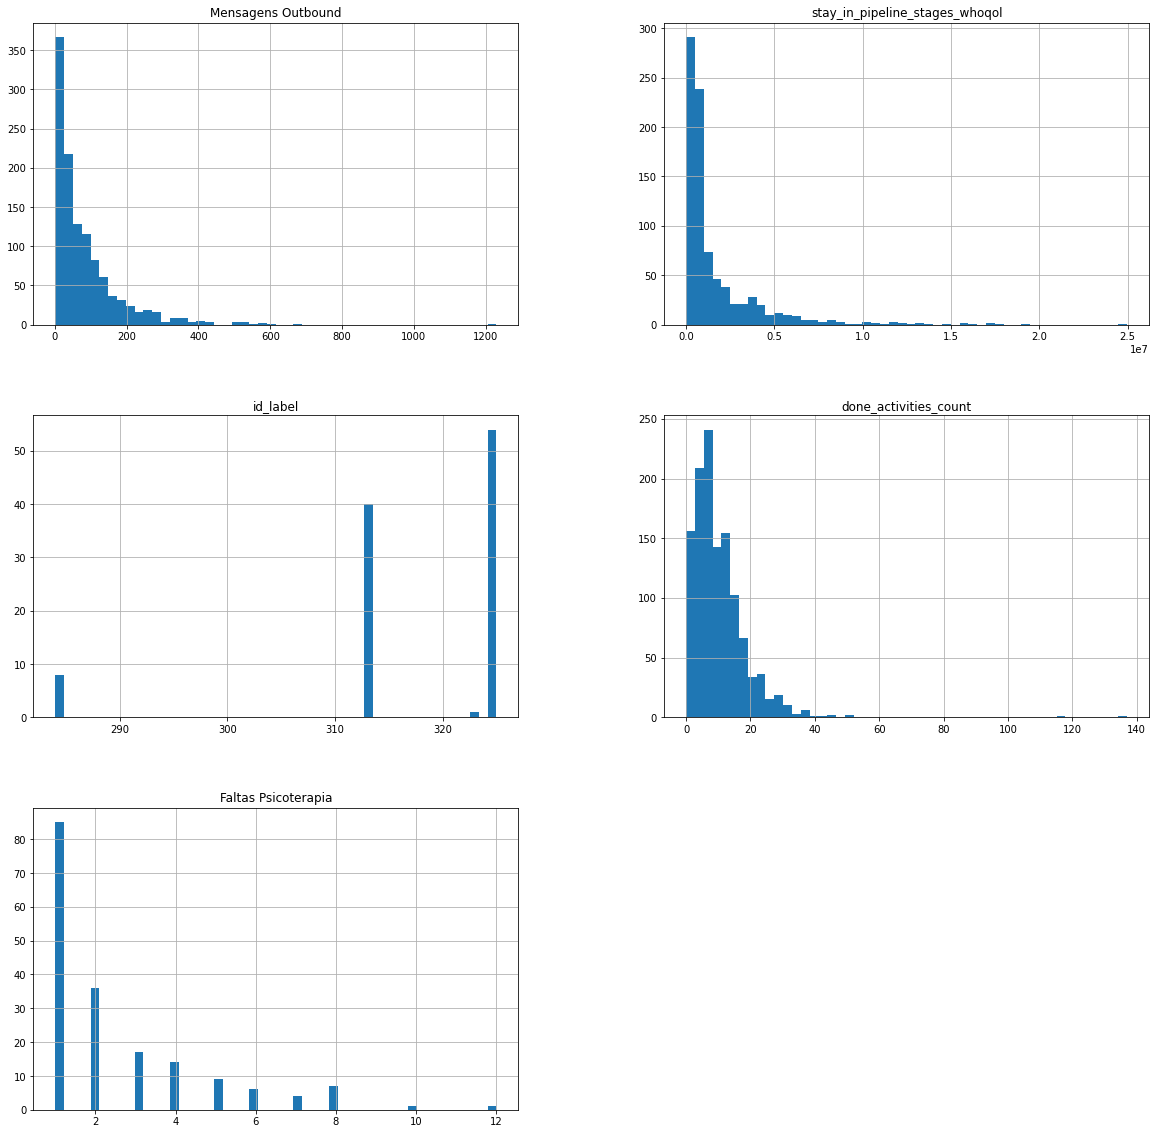

In [10]:
df_alfredo.hist(bins=50, figsize=(20,20))
plt.show()

In [11]:
df_alfredo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lost_reason.1                   317 non-null    object 
 1   lost_reason                     520 non-null    object 
 2   Mensagens Outbound              1158 non-null   float64
 3   Datas Atendimento Médico        1202 non-null   bool   
 4   stay_in_pipeline_stages_whoqol  864 non-null    float64
 5   id_label                        103 non-null    float64
 6   done_activities_count           1202 non-null   int64  
 7   state                           1185 non-null   object 
 8   Faltas Psicoterapia             180 non-null    float64
 9   Data Última Mensagens Outbound  1158 non-null   object 
 10  Qde Atendimentos Acolhimento    1202 non-null   bool   
 11  status                          1079 non-null   object 
dtypes: bool(2), float64(4), int64(1), 

### lost_reason.1 - Onboarding

Motivo pelo qual a pessoa não concluiu o processo de onboarding.

In [12]:
df['lost_reason.1'].dropna()

1                                     Cancelou assinatura
6                                     Cancelou assinatura
9       [Onboarding] Não retornou aos contatos de resgate
17      [Onboarding] Não tem interesse em seguir nas e...
23      [Onboarding] Não tem interesse em seguir nas e...
                              ...                        
1122    [Onboarding] Não retornou aos contatos de resgate
1126    [Onboarding] Não retornou aos contatos de resgate
1129    [Onboarding] Não retornou aos contatos de resgate
1131    [Onboarding] Não retornou aos contatos de resgate
1148    [Onboarding] Não retornou aos contatos de resgate
Name: lost_reason.1, Length: 317, dtype: object

### lost_reason - Assinatura

Motivo do cancelamento por assinatura (separada por vírgula).

In [13]:
df['lost_reason'].dropna()

24                 [Assinatura] Não quer seguir com a Ana
28                    [Assinatura] Precisou cortar custos
30      [Assinatura] Cancelamento após saída da psicot...
36       [Assinatura] Empresa cancelou o benefício da Ana
37                     Empresa está encerrando a operação
                              ...                        
1110                  [Assinatura] Precisou cortar custos
1112               [Assinatura] Não quer seguir com a Ana
1114                            [Assinatura] Desligamento
1120                            [Assinatura] Desligamento
1133                            [Assinatura] Desligamento
Name: lost_reason, Length: 520, dtype: object

### Mensagens Outbound - 

Contagem de mensagens enviadas pela equipe de saúde. Pode ser interessante ver q quantidade ao longo do tempo, assim, mostrando como que o cuidado vai evoluindo com o passar do tempo, mas, não temos acesso ao log de mensagens por dia, apenas por cliente.

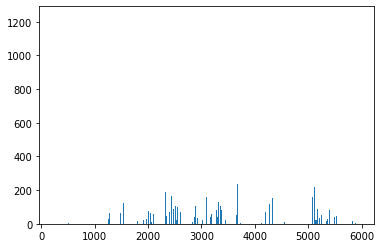

In [14]:
plt.bar(df['id_person'],df['Mensagens Outbound'])
plt.show()

Média de mensagens.

In [15]:
df['Mensagens Outbound'].mean()

83.27806563039724

Primeiro Quartil de mensagens.

In [16]:
df['Mensagens Outbound'].quantile(0.25)

19.0

Quartil superior (acima de 75% de número de mensagens).

In [17]:
df['Mensagens Outbound'].quantile(0.75)

110.0

### Datas Atendimento Médico - 
Data dos atendimentos com a equipe médica. Importante ver a quantidade de atendimentos por cliente ou empresa que existem.


In [18]:
df['Datas Atendimento Médico']

0       False
1       False
2       False
3       False
4       False
        ...  
1197    False
1198    False
1199    False
1200    False
1201    False
Name: Datas Atendimento Médico, Length: 1202, dtype: bool

In [19]:
df[df['Datas Atendimento Médico']!=False]

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos,Has-Ended


Está completamente nula. Droppar imediatamente.

### stay_in_pipeline_stages_whoqol - 

Tempo até a realização da atendimento para pactuar a jornada de cuidados. Não sabemos qual a unidade de medida de tempo utilizada.

In [20]:
df['stay_in_pipeline_stages_whoqol']

len(df['stay_in_pipeline_stages_whoqol'].dropna())

864

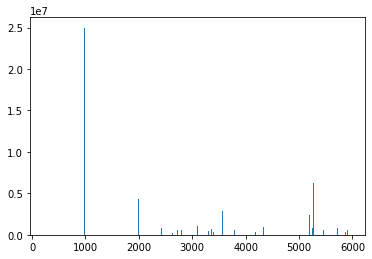

In [21]:
filtro = pd.notna(df['stay_in_pipeline_stages_whoqol'])

users_fizeram = df[filtro]['id_person']
tempo_testes_feitos = df[filtro]['stay_in_pipeline_stages_whoqol']

plt.bar(users_fizeram, tempo_testes_feitos)
plt.show()

O que é possível ver são tempos muito altos (já que a escala está relativa), indicando uma possível demora para realizar o teste de satisfação com a própria vida.

### id_label - 

Identificador do status do agendamento durante o processo de onboarding: Convera Agendada, Reagendar.

Só há 103 valores não nulos e não sabemos o valor associado aos números presentes na coluna (cada um representa uma classe).


<AxesSubplot:>

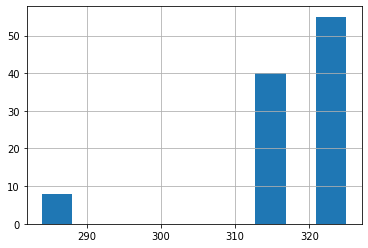

In [22]:
df['id_label'].hist()

In [23]:
df['id_label'].dropna()

38      284.0
69      325.0
78      284.0
81      284.0
137     323.0
        ...  
1182    313.0
1189    313.0
1191    313.0
1193    313.0
1198    313.0
Name: id_label, Length: 103, dtype: float64

### done_activities_count - 

Contagem das atividades concluídas relacionada à pessoa. Algo a ser levado em consideração quando analisarmos quais os clientes propícios a cancelar é o quanto eles usufruíram dos serviços antes do término.

In [24]:
df['done_activities_count']

0       8
1       4
2       0
3       0
4       0
       ..
1197    0
1198    0
1199    0
1200    0
1201    0
Name: done_activities_count, Length: 1202, dtype: int64

<AxesSubplot:>

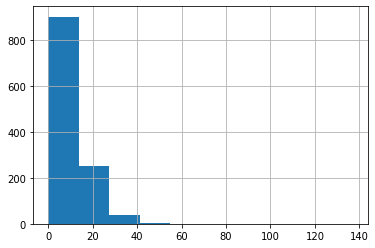

In [25]:
df['done_activities_count'].hist()

In [26]:
df['done_activities_count'].quantile(0.25), df['done_activities_count'].quantile(0.75)

(5.0, 13.0)

### state - 
Estado onde a pessoa reside.

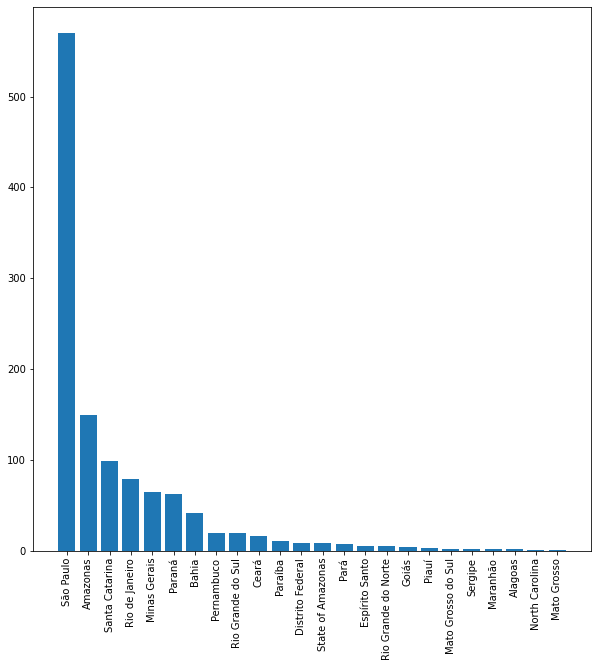

In [27]:
vc = df['state'].value_counts()
plt.figure(figsize=(10,10))
plt.bar(vc.index,vc.values)
plt.xticks(rotation=90)
plt.show()

Grande maioria dos usuários são situados em São Paulo.

### Faltas Psicoterapia - 

Contagem das faltas considerando apenas as sessões de psicoterapia. Se alguém acabar por faltar bastante, pode indicar alguma insatisfação com o serviço ou insegurança com o processo de terapia.

Há apenas 180 valores não nulos

In [28]:
df['Faltas Psicoterapia'].dropna()

28       1.0
50       8.0
55      12.0
65       1.0
72       2.0
        ... 
1105     2.0
1106     1.0
1111     1.0
1138     1.0
1142     1.0
Name: Faltas Psicoterapia, Length: 180, dtype: float64

<AxesSubplot:>

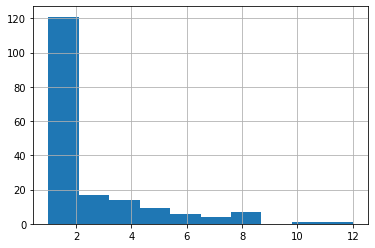

In [29]:
df['Faltas Psicoterapia'].hist()

### Data Última Mensagens Outbound
Data da última mensagem enviada pela equipe de saúde. Se essa data for anterior à última data da mensagem enviada pelo cliente isso é um possível problema.

In [30]:
df['Data Última Mensagens Outbound']

0       2023-01-30 16:24:27
1                       NaN
2                       NaN
3                       NaN
4                       NaN
               ...         
1197                    NaN
1198                    NaN
1199    2023-10-31 14:01:06
1200                    NaN
1201                    NaN
Name: Data Última Mensagens Outbound, Length: 1202, dtype: object

In [31]:
df['Data Última Mensagens Outbound'].value_counts()

2022-03-24 11:55:48    5
2023-10-31 18:40:50    3
2023-10-26 07:40:52    3
2023-10-30 18:40:51    3
2023-10-03 10:33:21    3
                      ..
2022-11-07 17:17:07    1
2023-10-27 18:55:34    1
2023-10-26 20:58:51    1
2022-06-17 11:01:17    1
2023-10-31 14:01:06    1
Name: Data Última Mensagens Outbound, Length: 1125, dtype: int64

In [32]:
df['Data Última Mensagens Outbound'] = pd.to_datetime(df['Data Última Mensagens Outbound'], format='%Y-%m-%d %H:%M:%S')
df['Data Última Mensagens Outbound']

0      2023-01-30 16:24:27
1                      NaT
2                      NaT
3                      NaT
4                      NaT
               ...        
1197                   NaT
1198                   NaT
1199   2023-10-31 14:01:06
1200                   NaT
1201                   NaT
Name: Data Última Mensagens Outbound, Length: 1202, dtype: datetime64[ns]

In [33]:
df['Data Última Mensagens Inbound'] = pd.to_datetime(df['Data Última Mensagens Inbound'], format='%Y-%m-%d %H:%M:%S')
df['Data Última Mensagens Inbound']

0      2023-01-02 15:36:27
1                      NaT
2                      NaT
3                      NaT
4                      NaT
               ...        
1197                   NaT
1198                   NaT
1199   2023-10-31 14:01:01
1200                   NaT
1201                   NaT
Name: Data Última Mensagens Inbound, Length: 1202, dtype: datetime64[ns]

In [34]:
filtro = df['Data Última Mensagens Inbound'] > df['Data Última Mensagens Outbound']

df_negligencia = df[filtro]

df_negligencia

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos,Has-Ended
17,408,1963-10-04,63.0,82.0,São Paulo,Marília,17502-242,428.0,2379.0,2021-01-28,...,2023-06-06 07:59:43,30.0,32.0,Cartão de crédito,91.54,0.0,0.0,0.0,False,True
23,463,1971-02-28,64.0,82.0,NaN,NaN,NaN,NaN,NaN,2021-02-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
30,860,1998-05-06,63.0,80.0,Paraná,Londrina,86020-410,NaN,NaN,2022-06-21,...,NaN,13.0,14.0,Cartão de crédito,88.00,1.0,0.0,0.0,False,False
38,973,1986-10-11,64.0,80.0,Minas Gerais,Uberlândia,38405-364,412.0,NaN,2021-06-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
51,1152,1994-08-31,64.0,80.0,São Paulo,São Carlos,13569-060,NaN,NaN,2021-08-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,5877,2003-01-15,63.0,80.0,Minas Gerais,Belo Horizonte,31310-360,NaN,NaN,2023-10-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1173,5893,1983-12-02,64.0,82.0,São Paulo,São Paulo,04303-001,NaN,NaN,2023-10-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1175,5897,1994-02-12,64.0,80.0,Pernambuco,Recife,54290-050,NaN,NaN,2023-10-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1184,5914,1998-03-03,64.0,80.0,Bahia,Salvador,40230-113,NaN,NaN,2023-10-24,...,NaN,1.0,1.0,Cartão de crédito,50.00,0.0,0.0,0.0,False,True


### Qde Atendimentos Acolhimento - 

Contagem dos atendimentos realizados com a equipe de acolhimento da Ana Health. Coluna inteira está vazia.

In [35]:
df['Qde Atendimentos Acolhimento'].describe()

count      1202
unique        1
top       False
freq       1202
Name: Qde Atendimentos Acolhimento, dtype: object

### Status - Assinatura 

Status por assinatura (separada por vírgula): Cancelada (lost), Ativa (won). O que acontece se o status for nulo?

In [36]:
df['status'].dropna()

24      lost
28      lost
30      lost
36      lost
37      lost
        ... 
1196     won
1197     won
1198     won
1200     won
1201     won
Name: status, Length: 1079, dtype: object

In [38]:
df['status'].value_counts()

won                                                 551
lost                                                450
lost; lost                                           31
won; lost                                            13
lost; won                                            12
won; won                                              6
lost; lost; lost                                      5
lost; won; lost                                       2
won; lost; lost; lost                                 1
lost; open                                            1
lost; lost; won; lost                                 1
open; won; lost                                       1
lost; won; won; won                                   1
won; won; won                                         1
lost; lost; won                                       1
won; lost; won                                        1
won; won; won; won; won; won; won; won; won; won      1
Name: status, dtype: int64

In [39]:
def lastStatus(x):
    s = x.split(';')
    return s[-1].strip()

status = df['status'].dropna().apply(lastStatus)

status.value_counts()

won     574
lost    504
open      1
Name: status, dtype: int64